In [88]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [112]:
# создаём класс Модель который наследуется от nn.Module
class Model(nn.Module):
#     входной слой (4 признака цветка) -
# -> в скрытый слой1 (число нейронов) -
# -> сс2(N) --> выходной слой(3 класса цветков)
    def __init__(self, in_fetures=4, h1=8, h2=9, out_features=3):
        super().__init__() # создание экземпляра?
        self.func1 = nn.Linear(in_fetures, h1)
        self.fc2= nn.Linear(h1, h2)
        self.out = nn.Linear(h2, out_features)
    
    def forward(self, x):
        x = F.relu(self.func1(x))
        x = F.relu(self.fc2(x))
        x = self.out(x)
        
        return x

In [113]:
# выберем начальный сид
torch.manual_seed(42)
# заводим модель?
model = Model()

In [114]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [115]:
iris_url = 'https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv'
df = pd.read_csv(iris_url)

In [116]:
df

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


In [117]:
# переименуем последнюю колнку
df['variety'] = df['variety'].replace('Setosa', 0.0)
df['variety'] = df['variety'].replace('Versicolor', 1.0)
df['variety'] = df['variety'].replace('Virginica', 2.0)

In [118]:
df

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


In [119]:
# Устновка X,y
X = df.drop('variety', axis=1)
y = df['variety']

In [120]:
# перевод в массив нампай
X = X.values 
y = y.values

In [121]:
from sklearn.model_selection import train_test_split

In [122]:
# Разделение на тренировочную и тестовую выборку
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [123]:
# Перевод в тензоры торча
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [124]:
# Выбор критерия ошибки для модели 
creterion = nn.CrossEntropyLoss()
# Выбор оптимизатора 
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [125]:
# тренировка модели 
# Выбор количества эпох
epochs = 200
losses = []
for i in range(epochs):
    y_pred = model.forward(X_train) # сделать предположение (шаг)
    
    #расчет потери
    loss = creterion(y_pred, y_train)
    
    losses.append(loss.detach().numpy())
    
    #каждые 10 эпох...
    if i % 10 == 0:
        print(f'Эпоха номер {i}, функция потерь равна {loss}')
              
    #обновление весов
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

Эпоха номер 0, функция потерь равна 1.0846974849700928
Эпоха номер 10, функция потерь равна 0.9178672432899475
Эпоха номер 20, функция потерь равна 0.7620365619659424
Эпоха номер 30, функция потерь равна 0.6275593042373657
Эпоха номер 40, функция потерь равна 0.46693310141563416
Эпоха номер 50, функция потерь равна 0.2876906991004944
Эпоха номер 60, функция потерь равна 0.16747017204761505
Эпоха номер 70, функция потерь равна 0.10634326189756393
Эпоха номер 80, функция потерь равна 0.08051121979951859
Эпоха номер 90, функция потерь равна 0.06965287029743195
Эпоха номер 100, функция потерь равна 0.06449068337678909
Эпоха номер 110, функция потерь равна 0.06162194907665253
Эпоха номер 120, функция потерь равна 0.059805769473314285
Эпоха номер 130, функция потерь равна 0.05852556973695755
Эпоха номер 140, функция потерь равна 0.057549674063920975
Эпоха номер 150, функция потерь равна 0.05676274374127388
Эпоха номер 160, функция потерь равна 0.05610178783535957
Эпоха номер 170, функция пот

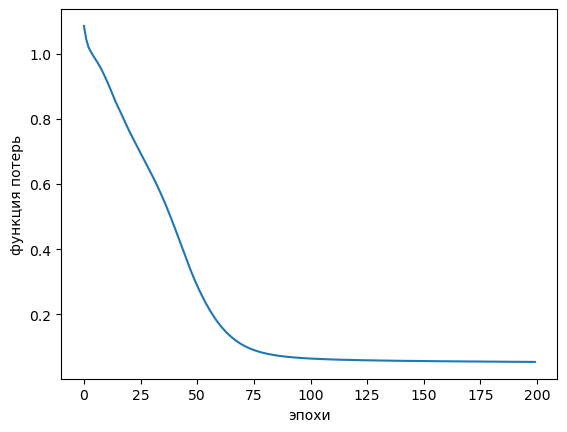

In [126]:
plt.plot(range(epochs), losses)
plt.ylabel('функция потерь')
plt.xlabel('эпохи')
plt.show()